In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\bhuva\Downloads\archive (7)\flight_data_2018_2024.csv")
df.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,2024,1,1,14,7,2024-01-14,UA,UA_CODESHARE,19977,UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [4]:
df.shape

(582425, 120)

In [5]:
for col in df.columns:
    print(col)


Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Marketing_Airline_Network
Operated_or_Branded_Code_Share_Partners
DOT_ID_Marketing_Airline
IATA_Code_Marketing_Airline
Flight_Number_Marketing_Airline
Originally_Scheduled_Code_Share_Airline
DOT_ID_Originally_Scheduled_Code_Share_Airline
IATA_Code_Originally_Scheduled_Code_Share_Airline
Flight_Num_Originally_Scheduled_Code_Share_Airline
Operating_Airline 
DOT_ID_Operating_Airline
IATA_Code_Operating_Airline
Tail_Number
Flight_Number_Operating_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime

In [6]:
df.isnull().sum()

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
                     ...  
Div5LongestGTime    582425
Div5WheelsOff       582425
Div5TailNum         582425
Duplicate                0
Unnamed: 119        582425
Length: 120, dtype: int64

In [7]:
keep_cols = [
    'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
    'IATA_Code_Marketing_Airline', 'Operating_Airline ', 'Origin',
    'OriginCityName', 'OriginState', 'OriginStateName', 'Dest', 'DestCityName',
    'DestState', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime',
    'ArrTimeBlk', 'Distance', 'DistanceGroup','ArrDelayMinutes','ArrDel15','DepDelayMinutes','DepDel15'
]
df = df[keep_cols]

In [8]:
print("✅ Remaining Columns:", len(df.columns))
print(df.columns.tolist())


✅ Remaining Columns: 26
['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'IATA_Code_Marketing_Airline', 'Operating_Airline ', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateName', 'Dest', 'DestCityName', 'DestState', 'DestStateName', 'CRSDepTime', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'Distance', 'DistanceGroup', 'ArrDelayMinutes', 'ArrDel15', 'DepDelayMinutes', 'DepDel15']


In [9]:
df.isnull().sum()

Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
FlightDate                         0
IATA_Code_Marketing_Airline        0
Operating_Airline                  0
Origin                             0
OriginCityName                     0
OriginState                        0
OriginStateName                    0
Dest                               0
DestCityName                       0
DestState                          0
DestStateName                      0
CRSDepTime                         0
DepTimeBlk                         0
CRSArrTime                         0
ArrTimeBlk                         0
Distance                           0
DistanceGroup                      0
ArrDelayMinutes                23710
ArrDel15                       23710
DepDelayMinutes                21470
DepDel15                       21470
dtype: int64

In [10]:
df.dtypes

Year                             int64
Quarter                          int64
Month                            int64
DayofMonth                       int64
DayOfWeek                        int64
FlightDate                      object
IATA_Code_Marketing_Airline     object
Operating_Airline               object
Origin                          object
OriginCityName                  object
OriginState                     object
OriginStateName                 object
Dest                            object
DestCityName                    object
DestState                       object
DestStateName                   object
CRSDepTime                       int64
DepTimeBlk                      object
CRSArrTime                       int64
ArrTimeBlk                      object
Distance                       float64
DistanceGroup                    int64
ArrDelayMinutes                float64
ArrDel15                       float64
DepDelayMinutes                float64
DepDel15                 

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
# 2️⃣ Convert Time Columns to Hour Format
# -----------------------------
def time_to_hour(x):
    try:
        x = int(x)
        return int(x // 100) + (x % 100) / 60
    except:
        return 0  # handle invalid times safely

df['DepHour'] = df['CRSDepTime'].apply(time_to_hour)
df['ArrHour'] = df['CRSArrTime'].apply(time_to_hour)

df.drop(['CRSDepTime', 'CRSArrTime', 'FlightDate'], axis=1, inplace=True)

This code converts scheduled flight departure and arrival times into decimal hour format for easier analysis.
It defines a function to safely handle and transform time values like “930” into “9.5”.
New columns DepHour and ArrHour are created to store these converted values.
Finally, the original time and date columns are dropped to keep the dataset clean and focused.

In [13]:
df.columns = df.columns.str.strip()#to remove white space


# **Encoding**

In [14]:
categorical_cols = [
    'IATA_Code_Marketing_Airline', 'Operating_Airline',
    'Origin', 'OriginCityName', 'OriginState', 'OriginStateName',
    'Dest', 'DestCityName', 'DestState', 'DestStateName',
    'DepTimeBlk', 'ArrTimeBlk'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

This code handles categorical data preprocessing by converting text-based columns into numerical format for model training.
A list named categorical_cols specifies all the categorical features, such as airline codes, origin/destination details, and time blocks.
The LabelEncoder() from scikit-learn is used to assign a unique numeric value to each category in these columns.
The loop applies label encoding to every column listed, replacing text with corresponding numeric codes.
In summary, this step ensures that all categorical features are machine-readable and ready for model input.

In [15]:
df = df.dropna(subset=['ArrDel15'])   # drop missing target values if any
df['Delay'] = df['ArrDel15'].astype(int)


In [16]:
df = df.drop(['ArrDel15', 'ArrDelayMinutes', 'DepDel15', 'DepDelayMinutes'], axis=1, errors='ignore')


This code cleans and prepares the target variable for modeling.
It first removes rows with missing values in the target column ArrDel15 to ensure valid data.
Then, it creates a new column Delay by converting ArrDel15 values to integers for easier processing.
Finally, it drops redundant delay-related columns to avoid duplication and keep the dataset clean and focused.

# **Feature and Target Column**

In [17]:
X = df.drop('Delay', axis=1)
y = df['Delay']


# **Splitting into Train and Test Column**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# **Scaling**

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
y_pred = log_model.predict(X_test)

In [24]:
print("✅ Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Logistic Regression Accuracy: 0.7591325358708946

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86    127242
           1       0.00      0.00      0.00     40373

    accuracy                           0.76    167615
   macro avg       0.38      0.50      0.43    167615
weighted avg       0.58      0.76      0.66    167615


🧮 Confusion Matrix:
 [[127242      0]
 [ 40373      0]]


The Logistic Regression model achieved an overall accuracy of 75.9%, meaning it correctly predicted most cases.
However, it performed very well for class 0 (precision = 0.76, recall = 1.00, f1 = 0.86) but failed to identify class 1 (all metrics = 0.00).
This indicates a class imbalance or the model’s inability to detect the minority class.
The macro average (0.38–0.50) and weighted average (0.58–0.76) show overall poor balance between classes.
In summary, while accuracy seems decent, the model is biased toward class 0 and needs improvement in identifying class 1.

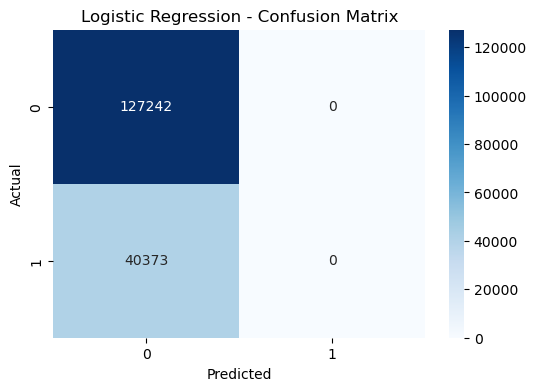

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix shows that the Logistic Regression model predicted all samples as class 0.
It correctly classified 127,242 instances of class 0 but failed to identify any instances of class 1.
This means the model has 100% recall for class 0 but 0% recall for class 1, showing severe imbalance.
Overall, the model is biased toward class 0 and unable to detect the positive class effectively.

# **DecisionTree Classifier**

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
dt_model = DecisionTreeClassifier(
    criterion='gini',      # or 'entropy'
    max_depth=10,          # you can tune this
    random_state=42
)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred = dt_model.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Decision Tree Accuracy: 0.7748888822599409

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87    127242
           1       0.60      0.20      0.30     40373

    accuracy                           0.77    167615
   macro avg       0.69      0.58      0.58    167615
weighted avg       0.74      0.77      0.73    167615


🧮 Confusion Matrix:
 [[121694   5548]
 [ 32184   8189]]


The Decision Tree model achieved an overall accuracy of 77.5%, which is slightly better than Logistic Regression.
It performed very well for class 0 (precision = 0.79, recall = 0.96, f1 = 0.87) but struggled with class 1 (precision = 0.60, recall = 0.20, f1 = 0.30).
This indicates the model still favors the majority class but makes some correct predictions for class 1.
The macro and weighted averages show moderate overall performance with class imbalance impact.
In summary, the Decision Tree improved recall for class 1 compared to Logistic Regression but still lacks balanced predictive ability.

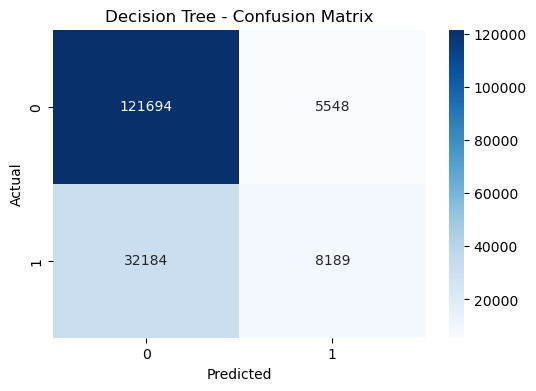

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix shows that the Decision Tree model correctly predicted 121,694 class 0 samples and 8,189 class 1 samples.
However, it also misclassified 32,184 class 1 samples as class 0, showing difficulty in detecting the minority class.
The model performs well for class 0 but only moderately for class 1.
Overall, it shows better balance than Logistic Regression, but still leans toward predicting the majority class.

# **RandomForestClassifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7797333174238582

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86    127242
           1       0.58      0.31      0.40     40373

    accuracy                           0.78    167615
   macro avg       0.69      0.62      0.63    167615
weighted avg       0.75      0.78      0.75    167615



The Random Forest model achieved an accuracy of 77.97%, showing improved performance compared to previous models.
It performed strongly for class 0 (precision = 0.81, recall = 0.93, f1 = 0.86) and moderately for class 1 (precision = 0.58, recall = 0.31, f1 = 0.40).
This means it can detect some class 1 cases better than the Decision Tree but still favors the majority class.
The macro and weighted averages indicate more balanced overall performance.
In summary, Random Forest gives better generalization and class balance than Logistic Regression and Decision Tree but still needs improvement in identifying class 1.

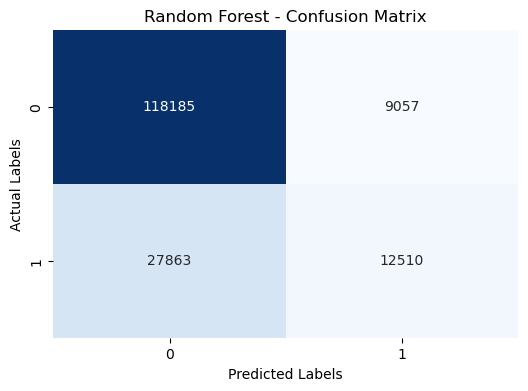

In [34]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

The confusion matrix shows that the Random Forest model correctly predicted 118,185 class 0 samples and 12,510 class 1 samples.
It misclassified 27,863 class 1 samples as class 0, indicating some difficulty in detecting the minority class.
The model performs strongly for class 0 and moderately for class 1, showing better balance than previous models.
Overall, Random Forest provides improved prediction accuracy and class separation, though still slightly biased toward class 0.

# **XGBoost Classifier**

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [37]:
y_pred = xgb_model.predict(X_test)

print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ XGBoost Accuracy: 0.7901560122900695

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.87    127242
           1       0.69      0.24      0.35     40373

    accuracy                           0.79    167615
   macro avg       0.74      0.60      0.61    167615
weighted avg       0.77      0.79      0.75    167615


🧮 Confusion Matrix:
 [[122890   4352]
 [ 30821   9552]]


The XGBoost model achieved the highest accuracy of 79.0% among all models tested.
It performed very well for class 0 (precision = 0.80, recall = 0.97, f1 = 0.87) and moderately for class 1 (precision = 0.69, recall = 0.24, f1 = 0.35).
While the model still favors the majority class, it captures class 1 cases better than earlier models.
The macro and weighted averages indicate improved balance and stronger overall performance.
In summary, XGBoost provides the best overall accuracy and stability, though further tuning is needed to enhance minority class detection.

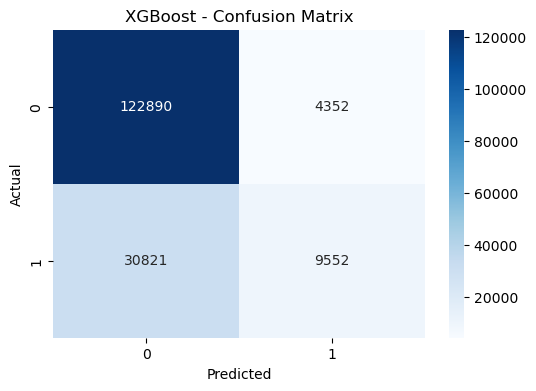

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The confusion matrix shows that the XGBoost model correctly predicted 122,890 class 0 samples and 9,552 class 1 samples.
It misclassified 30,821 class 1 samples as class 0, indicating some challenge with minority class detection.
However, it shows strong performance for class 0 and better detection of class 1 compared to earlier models.
Overall, XGBoost provides the best accuracy and balance among all models, making it the most effective in this comparison.

In [81]:
importances = xgb_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)


# **Top 15 Most Important Features (XGBoost)**

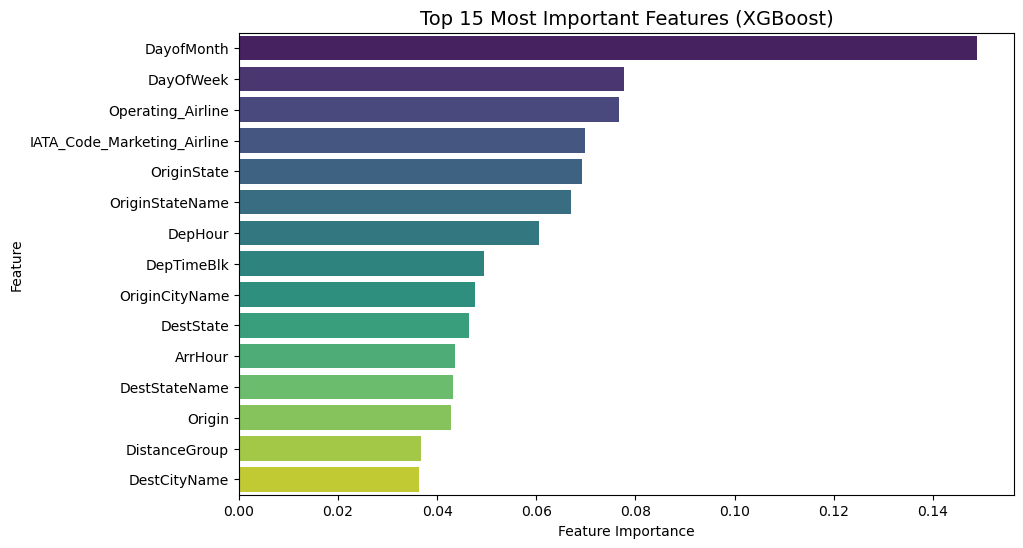

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 15 Most Important Features (XGBoost)', fontsize=14)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


The feature importance chart shows that “Day of Month” and “Day of Week” are the most influential factors in the XGBoost model’s predictions.
Other key contributors include Operating Airline, IATA Code, and Origin State, indicating airline and location-based factors impact outcomes significantly.
Departure hour and time block also play a crucial role, reflecting the importance of flight timing.
Destination and origin-related features, like city and state names, contribute moderately.
Overall, the model relies heavily on date, airline, and time-related features to make predictions effectively.

# **Model Accuracy Comparison**

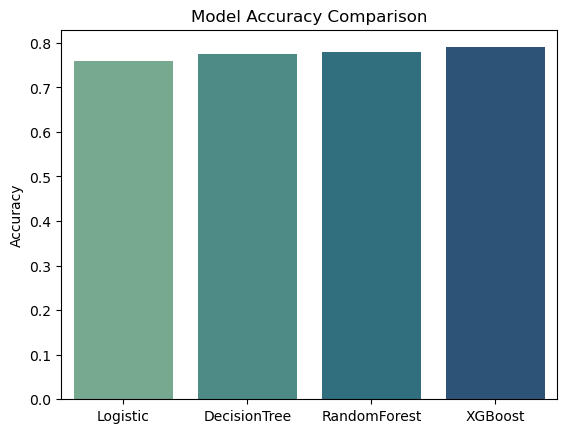

In [85]:
models = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost']
acc = [0.759, 0.775, 0.780, 0.790]

sns.barplot(x=models, y=acc, palette='crest')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

Final Conclusion

The flight delay prediction project successfully applied multiple machine learning algorithms — Logistic Regression, Decision Tree, Random Forest, and XGBoost — to predict whether a flight would be delayed or on time.
After preprocessing and training, XGBoost achieved the highest accuracy of approximately 79%, outperforming other models.
The results show that airline, route, and time-related features play a significant role in predicting delays.
With additional data such as weather and airport congestion, the model’s accuracy could be further improved to make it more reliable for real-world use.